<a href="https://colab.research.google.com/github/shahabday/NLP_learning/blob/main/Autoregression_SitCom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
import random
import shutil
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras import models, layers
from tqdm import tqdm
import numpy as np
import os
import kagglehub
import shutil
import pandas as pd


## Loading data from Kaggle


In [2]:
import os
import kagglehub
import shutil

# Define the folder where the dataset will be stored
output_folder = "/content/scripts"

# Ensure the directory exists
os.makedirs(output_folder, exist_ok=True)

# Download the dataset
path = kagglehub.dataset_download("divyansh22/friends-tv-show-script")

print("✅ Dataset downloaded and saved in:", path)

# Copy all files from the source path to the destination
shutil.copytree(path, output_folder, dirs_exist_ok=True)



100%|██████████| 1.67M/1.67M [00:01<00:00, 1.52MB/s]

Extracting files...
✅ Dataset downloaded and saved in: /root/.cache/kagglehub/datasets/divyansh22/friends-tv-show-script/versions/1


'/content/scripts'

## The big bang theory data import .


In [3]:

# Download latest version
path = kagglehub.dataset_download("mitramir5/the-big-bang-theory-series-transcript")

shutil.copytree(path, output_folder, dirs_exist_ok=True)

# convert the csv to txt and save it
df_script=pd.read_csv('/content/scripts/1_10_seasons_tbbt.csv')

df = df_script

# each row  :
# if episonde name is the first time : create episod name
# person scene : dialogue /n

output_file = "tbbt_script.txt"
seen_episodes = set()

with open(output_folder + '/' + output_file, "w", encoding="utf-8") as f:
    for _, row in df.iterrows():
        if row["episode_name"] not in seen_episodes:
            f.write(f"\n{row['episode_name']}\n")  # Write episode name
            f.write("=" * len(row["episode_name"]) + "\n")  # Underline episode name
            seen_episodes.add(row["episode_name"])

        f.write(f"{row['person_scene']}: {row['dialogue']}\n")



100%|██████████| 1.92M/1.92M [00:01<00:00, 1.78MB/s]

Extracting files...


## How I met Your Mother

In [14]:


# Download latest version
path = kagglehub.dataset_download("gibsonhu85/howimetyourmotherscript")


# Copy all files from the source path to the destination
shutil.copytree(path, output_folder, dirs_exist_ok=True)


'/content/scripts'

In [16]:
df_script=pd.read_csv('/content/scripts/himym_full_transcripts.csv')

In [15]:
df_script

,episode,name,line
0,4x02 - The Best Burger in New York,Barney,Goliath National Bank. The world leader in cr...
1,4x02 - The Best Burger in New York,Ted,"Okay, first of all, you look like the last pi..."
2,4x02 - The Best Burger in New York,Barney,Our company just bought them out in a ruthles...
3,4x02 - The Best Burger in New York,Lily,"Barney, Marshall didn't quit his last soul-su..."
4,4x02 - The Best Burger in New York,Ted,"So, what do you guys want to do for dinner?\n"
...,...,...,...
24005,2x21 - Something Borrowed,Lily,Tired. I got married twice today.\n
24006,2x21 - Something Borrowed,Marshall,So where do you want to do it for the first ti...
24007,2x21 - Something Borrowed,Lily,"What do you think? Bathroom, of course.\n"
24008,2x21 - Something Borrowed,Ted,Please don't.\n


In [17]:

df = df_script

# each row  :
# if episonde name is the first time : create episod name
# person scene : dialogue /n

output_file = "himym_script.txt"
seen_episodes = set()

with open(output_folder + '/' + output_file, "w", encoding="utf-8") as f:
    for _, row in df.iterrows():
        if row["episode"] not in seen_episodes:
            f.write(f"\n{row['episode']}\n")  # Write episode name
            f.write("=" * len(row["episode"]) + "\n")  # Underline episode name
            seen_episodes.add(row["episode"])

        f.write(f"{row['name']}: {row['line']}\n")



## Create Datasets

In [18]:

#path =
# Find all the files.
paths_all = glob.glob("scripts/*.txt")
print(sorted(paths_all))


['scripts/Friends_Transcript.txt', 'scripts/himym_script.txt', 'scripts/tbbt_script.txt']


In [10]:
paths_all[0].split("/")[1].split(".")[0]

'tbbt_script'

In [32]:
path

'dataset_/valid'

In [19]:
# read files

#path =
# Find all the files.
paths_all = glob.glob("scripts/*.txt")
print(sorted(paths_all))


# standardize

# Standardize.
for path in paths_all:

  filename=path.split("/")[1].split(".")[0]
  content = open(path).read()
  content = content.lower()
  for punctuation in ".,:;?!":
      content = content.replace(punctuation, " " + punctuation)
  open(path, "w").write(content)


  #split 80 to 20 for validatoin

  content = open(path).read()
  split_index = int(len(content) * 0.8) #split index


  content_test = content[:split_index] # first 80%
  content_valid = content[split_index:] # last 20%



  # create two files ,from one file which containts all scripts

  dataset_path = "dataset_"
  dataset_path_all = os.path.join(dataset_path, "all")
  dataset_path_train = os.path.join(dataset_path, "train")
  dataset_path_valid = os.path.join(dataset_path, "valid")


  # create all the folders

  for path in [dataset_path, dataset_path_all, dataset_path_train, dataset_path_valid]:
      if not os.path.exists(path):
          os.mkdir(path)


  print(filename)
  open(dataset_path_all + "/{}_all.txt".format(filename), "w").write(content)
  open(dataset_path_train + "/{}_test.txt".format(filename), "w").write(content_test)
  open(dataset_path_valid+ "/{}_valid.txt".format(filename), "w").write(content_valid)





# make folders for train and validation and copy files




['scripts/Friends_Transcript.txt', 'scripts/himym_script.txt', 'scripts/tbbt_script.txt']
tbbt_script
Friends_Transcript
himym_script


In [20]:
batch_size  = 64  # not for SGD! This is a different batch size.
seed = 667

def create_dataset(dataset_path):
    dataset = preprocessing.text_dataset_from_directory(
        dataset_path,
        labels=None,
        batch_size=batch_size,
        seed=seed
    )
    return dataset

dataset_original_all = create_dataset(dataset_path_all)
dataset_original_train = create_dataset(dataset_path_train)
dataset_original_valid = create_dataset(dataset_path_valid)



Found 3 files.
Found 3 files.
Found 3 files.


In [30]:
vocabulary_size = 30_000
encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=None,
    split="whitespace",
    output_mode="int"
)
encoder.adapt(dataset_original_all)
vocabulary = encoder.get_vocabulary()
print(vocabulary[:100])

['', '[UNK]', '.', ':', ',', 'you', 'i', 'the', '?', 'to', '!', 'a', 'and', 'it', 'that', 'is', 'of', 'in', 'what', 'sheldon', 'oh', 'me', 'this', 'my', 'ross', 'on', 'rachel', 'monica', 'chandler', 'joey', 'no', 'leonard', 'not', 'with', 'just', 'so', 'have', 'know', 'for', 'we', 'do', 'phoebe', 'are', 'was', 'but', 'your', 'penny', 'be', 'yeah', 'okay', 'well', '.)', 'all', 'ted', 'her', 'like', 'at', 'out', 'up', 'right', 'howard', 'about', 'get', 'he', 'hey', 'if', 'can', 'go', 'barney', 'one', 'marshall', "i'm", 'raj', 'i’m', 'she', 'here', 'really', 'how', 'there', 'think', 'robin', 'him', 'gonna', "it's", 'his', 'lily', 'now', 'want', 'amy', 'look', 'why', 'did', 'going', 'see', 'got', 'good', 'uh', 'it’s', 'as', 'come']


In [31]:

sequence_length = 32
vocabulary = encoder.get_vocabulary()
padding_token_id = 0


def create_dataset_for_autoregression(dataset):
  x_inputs = []
  y_outputs = []
  for stories in dataset:
    stories = encoder(stories).numpy() # Does the padding

    for story in stories:
      story = [index for index in list(story) if index != padding_token_id] # removes padding

      # Allowing to generate from sequences that are shorter than sequence length.
      padding = [padding_token_id] * sequence_length
      story = padding + story

      for start_index in range(0,len(story)-sequence_length): # no overflow.
          x = story[start_index:start_index + sequence_length]
          assert len(x) == sequence_length, "Should not happen."
          y = story[start_index + 1 :start_index + sequence_length+1]
          assert len(y) == sequence_length , "should not happen"

          x_inputs += [x]
          y_outputs += [y]


  # Done,
  return tf.data.Dataset.from_tensor_slices((x_inputs, y_outputs))


dataset_train = create_dataset_for_autoregression(dataset_original_train)
dataset_valid = create_dataset_for_autoregression(dataset_original_valid)

In [32]:
def decode(indices):
  return " ".join([vocabulary[index] for index in indices if vocabulary[index] != ""])

for input,output in dataset_train.take(20):
  print(decode(input))
  print(decode(output))
  print("")


series

series
series 01

series 01
series 01 episode

series 01 episode
series 01 episode 01

series 01 episode 01
series 01 episode 01 –

series 01 episode 01 –
series 01 episode 01 – [UNK]

series 01 episode 01 – [UNK]
series 01 episode 01 – [UNK] [UNK]

series 01 episode 01 – [UNK] [UNK]
series 01 episode 01 – [UNK] [UNK] scene

series 01 episode 01 – [UNK] [UNK] scene
series 01 episode 01 – [UNK] [UNK] scene :

series 01 episode 01 – [UNK] [UNK] scene :
series 01 episode 01 – [UNK] [UNK] scene : a

series 01 episode 01 – [UNK] [UNK] scene : a
series 01 episode 01 – [UNK] [UNK] scene : a corridor

series 01 episode 01 – [UNK] [UNK] scene : a corridor
series 01 episode 01 – [UNK] [UNK] scene : a corridor at

series 01 episode 01 – [UNK] [UNK] scene : a corridor at
series 01 episode 01 – [UNK] [UNK] scene : a corridor at a

series 01 episode 01 – [UNK] [UNK] scene : a corridor at a
series 01 episode 01 – [UNK] [UNK] scene : a corridor at a sperm

series 01 episode 01 – [UNK] [UNK] s

In [25]:
import matplotlib.pyplot as plt

def render_history(history):
    plt.title("Training loss vs. validation loss")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Training accuracy vs. validation accuracy")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Embedding (Embedding)     │ (None, 32, 64)         │      1,920,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_18 (Add)              │ (None, 32, 64)         │              0 │ Embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_16    │ (None, 32, 64)         │            128 │ add_18[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_8    │ (None, 32, 64)         │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_19 (Add)              │ (None, 32, 64)         │              0 │ multi_head_attention_… │
│                           │                        │                │ add_18[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_17    │ (None, 32, 64)         │            128 │ add_19[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 32, 128)        │          8,320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 32, 64)         │          8,256 │ dense_18[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_20 (Add)              │ (None, 32, 64)         │              0 │ dense_19[0][0],        │
│                           │                        │                │ add_19[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_18    │ (None, 32, 64)         │            128 │ add_20[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_9    │ (None, 32, 64)         │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_21 (Add)              │ (None, 32, 64)         │              0 │ multi_head_attention_… │
│                           │                        │                │ add_20[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_19    │ (None, 32, 64)         │            128 │ add_21[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)     

 Total params: 4,369,200 (16.67 MB)

 Trainable params: 4,369,200 (16.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 379s 159ms/step - accuracy: 0.1877 - loss: 5.0946 - val_accuracy: 0.2180 - val_loss: 5.0089
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 127s 135ms/step - accuracy: 0.2785 - loss: 4.0586 - val_accuracy: 0.2264 - val_loss: 4.9975
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 127s 135ms/step - accuracy: 0.3012 - loss: 3.7560 - val_accuracy: 0.2279 - val_loss: 5.0782
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 127s 135ms/step - accuracy: 0.3167 - loss: 3.5802 - val_accuracy: 0.2270 - val_loss: 5.1599
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 127s 135ms/step - accuracy: 0.3288 - loss: 3.4618 - val_accuracy: 0.2291 - val_loss: 5.2197


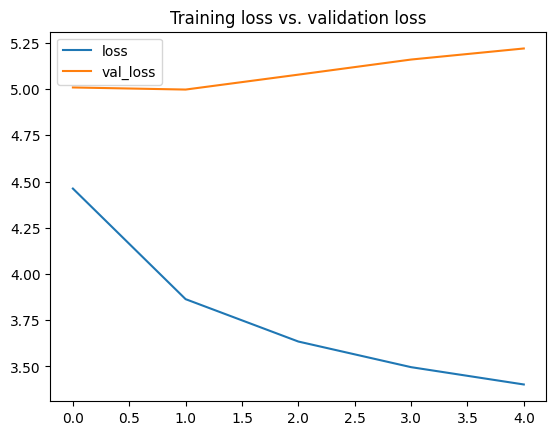

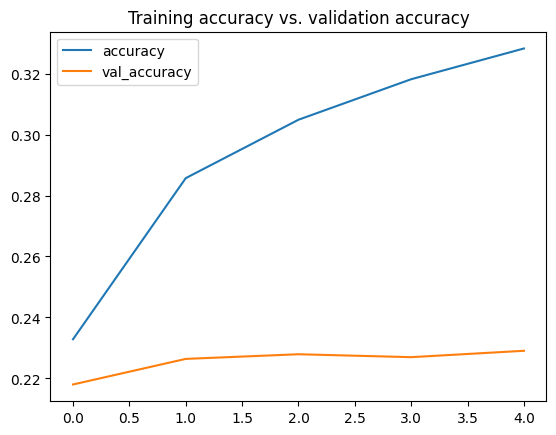

In [33]:
from re import X
def create_transformer( sequence_length = 32 , embedding_size = 64 , layers_number = 6 , num_heads=4):

  #functional API.

  inputs = tf.keras.Input(shape=(sequence_length,), dtype=tf.int32)
  embedding=layers.Embedding(vocabulary_size , embedding_size, name='Embedding')(inputs)

  positions = tf.range(start=0, limit=sequence_length, delta=1) # [0, 1, 2, ... , 31] constant
  positional_embedding = layers.Embedding(sequence_length, embedding_size,name='Positional')(positions)
  embedding += positional_embedding

  for _ in range( layers_number):

    x1 = layers.LayerNormalization(epsilon = 1e-6)(embedding)

    attention_output= layers.MultiHeadAttention(

                                                num_heads = num_heads,
                                                key_dim = embedding_size,
                                                dropout = 0.1
    )(x1,x1, use_causal_mask = True )  # V/K + Q

    # skip connection.
    x2 = attention_output + embedding
    # Normalize .
    x3 = layers.LayerNormalization(epsilon = 1e-6)(x2)

    # MLP.

    x4  = layers.Dense(embedding_size * 2 , activation = 'gelu')(x3)
    x4  = layers.Dense(embedding_size, activation = 'gelu')(x4)


    # skip connection

    embedding = x4+x2


  #Head.
  outputs = layers.Dense (vocabulary_size , activation='softmax')(embedding)
  return models.Model(inputs , outputs)




model = create_transformer()
model.summary()


model.compile (

               optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=["accuracy"]
)

history = model.fit(

                    dataset_train.cache().shuffle(20_000).batch(2048),
                    epochs= 5 ,
                    validation_data = dataset_valid.batch(2048)
)

render_history(history)



In [34]:


import numpy as np

def generate(model, seed_text, generated_sequence_length, temperature):

    seed_text = seed_text.lower()
    for punctuation in ".,:;?!":
        seed_text = seed_text.replace(punctuation, " " + punctuation)

    input_sequence = encoder(seed_text).numpy().tolist()

    # Generate the sequence by repeatedly predicting.
    while len(input_sequence) < generated_sequence_length:
        prediction = model.predict(np.expand_dims(input_sequence, axis=0), verbose=False)
        predicted_index = get_index_from_prediction(prediction[0][-1], temperature)
        input_sequence.append(predicted_index)

    # Convert the generated sequence to a string.
    text = decode(input_sequence)
    for punctuation in ".,:;?!":
        text = text.replace(" " + punctuation, punctuation)
    print(text)
    print("")



def get_index_from_prediction(prediction, temperature=0.0):
    """ Gets an index from a prediction. """

    # Zero temperature - use the argmax.
    if temperature == 0.0:
        return np.argmax(prediction)

    # Non-zero temperature - do some random magic.
    else:
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / temperature # softmax formula is : ex/sigma(ex) getting logarithm ,cancels this out
        # log amplifies x<1 , of course it negates them
        # it T is smaller than 1  , push lower peaks to higher numbers and vise versa

        exp_prediction= np.exp(prediction)
        prediction = exp_prediction / np.sum(exp_prediction)
        probabilities = np.random.multinomial(1, prediction, 1)
        return np.argmax(probabilities)


def generate_with_padding(model, seed_text, generated_sequence_length, temperature):
    seed_text = seed_text.lower()
    for punctuation in ".,:;?!":
        seed_text = seed_text.replace(punctuation, " " + punctuation)


    input_sequence = encoder(seed_text).numpy().tolist()

    # Pad the input_sequence if it's shorter than sequence_length
    if len(input_sequence) < sequence_length:
        input_sequence = [0] * (sequence_length - len(input_sequence)) + input_sequence

    # Generate the sequence by repeatedly predicting.
    while len(input_sequence) < generated_sequence_length:
        sequence = input_sequence[-sequence_length:]
        assert len(sequence) == sequence_length

        prediction = model.predict(np.expand_dims(sequence, axis=0), verbose=False)
        predicted_index = get_index_from_prediction(prediction[0][-1], temperature)

        input_sequence.append(predicted_index)

    # Convert the generated sequence to a string.
    text = decode(input_sequence)
    for punctuation in ".,:;?!":
        text = text.replace(" " + punctuation, punctuation)
    text = text.strip()
    print(text)
    print("")

generate_with_padding(model, "sheldon chandler and Barney are sitting in a  ", 100, temperature=1)

sheldon chandler and barney are sitting in a [UNK] water as rachel enters carrying joey interrupting, from.] joey: thats so sweet(grabs a manly look on, with milk!" and dont hang on a [UNK]. do you look at this porn, i swear, i have a beard of the yams! last guest: absolutely! here comes giving her now this! (hands him a book) and dina) a

